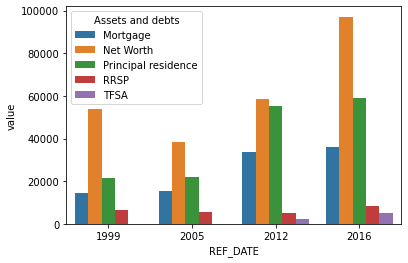

In [3]:
import pandas as pd 
import seaborn as sns

# load dataframe
df = pd.read_csv('data/raw/under35.csv')
df = df[['REF_DATE', 'Assets and debts', 'VALUE']]

portfolio_metrics = ['Registered Retirement Savings Plans (RRSPs), Registered Retirement Income Funds (RRIFs), Locked-in Retirement Accounts (LIRAs) and other', 'Net Worth (assets less debts)', 'Principal residence', 'Tax Free Saving Accounts (TFSA)', 'Mortgage on principal residence']

df = df.loc[df['Assets and debts'].isin(portfolio_metrics)]
df.groupby('REF_DATE')

df = df.pivot_table(values='VALUE', index='REF_DATE', columns='Assets and debts').reset_index().melt(id_vars='REF_DATE')
df['Assets and debts'] = df['Assets and debts'].replace({'Registered Retirement Savings Plans (RRSPs), Registered Retirement Income Funds (RRIFs), Locked-in Retirement Accounts (LIRAs) and other': 'RRSP', 'Net Worth (assets less debts)': 'Net Worth', 'Tax Free Saving Accounts (TFSA)' : 'TFSA', 'Mortgage on principal residence':"Mortgage"})

sns.set_palette("tab10")
sns.barplot(data=df, x='REF_DATE', y='value', hue='Assets and debts')
# sns.lineplot(data=df, x='REF_DATE', y='value', hue='Assets and debts')

In [4]:
df.to_csv('data/processed/portfolio.csv')